# Finite difference method

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
def ode_shooting(F,t0,tf,y0,yf,n=100,tol=10**(-8),kmax=10):
    """
    The solver of Boundary Value Problem (y'' = f(t,y,y')) by shooting method
 
    F   : the vector type function
    t0  : initial value of independent variable
    tf  : final value of independent variable
    y0  : initial value of dependent variable
    yf  : final value of dependent variable
    tol : the tolerance 
    n   : number of time steps
    kmax: the maximal number of shootings  
 
    The return is a list of y(t)
    """
    yp0 = float(yf-y0)/(tf-t0) #The initial guess of y'(0)
    Y0 = np.array([y0,yp0]) #轉成shooting method的矩陣Y(t0)
    Y = ode_RK4(F,t0,tf,Y0,n)
    err = Y[-1][0]-yf #The 1st mismatching
    Y0[1] = yp0-0.1*np.sign(err) #The sign function returns -1 if x < 0, 0 if x==0, 1 if x > 0
     
    for k in range(kmax-1):
        Y = ode_RK4(F,t0,tf,Y0,n)
        err1 = Y[-1][0]-yf
        ddy = Y0[1]-yp0 #difference between successive derivatives
        if abs(err1)<tol or abs(ddy)<tol:
            y = list()
            for x in Y:
                y.append(x[0])
            return np.array(y), Y0[1], err
 
        deddy = (err1-err)/ddy #The gradient of mismatching error
        yp0 = Y0[1]
        err = err1
        Y0[1] = Y0[1] -err/deddy #modify by secant method
    y = list()
    
    for x in Y:
        y.append(x[0])
    return np.array(y), Y0[1], err
    


In [3]:
def ode_RK4(f,t0,tf,y0=0,n=100):
    """
    First order ODE (y' = f(t,y)) Solver using RK4 method
     
    t0: initial value of independent variable
    tf: final value of independent variable
    y0: initial value of dependent variable
    n : number of steps
    f : function of f(t,y)
 
    The return is list of y(t)
    """
 
    t = np.linspace(t0,tf,n)
    y = list([y0])
    for i in range(n-1):
        h = t[i+1]-t[i]
        k1 = h*f(t[i],y[-1])
        k2 = h*f(t[i]+h/2.0,y[-1]+k1/2.0)
        k3 = h*f(t[i]+h/2.0,y[-1]+k2/2.0)
        k4 = h*f(t[i]+h,y[-1]+k3)
        y.append(y[-1]+(k1+2*k2+2*k3+k4)/6.0)
 
    y = np.array(y)
     
    return y

$y''+y=0$

$y(0)=0, y(\frac{13\pi}{6})=4$

Exact solution: $y(t) = 8sin(t)$

$y_0(t) = y(t), y_1(t) = y'(t)$

$Y'(t) = (y'(t), y''(t))^T = (y_1(t), -y_0(t))$

In [4]:
def F(t,Y):
    return np.array([Y[1],-Y[0]])

In [14]:
y1,yp,err = ode_shooting(F,0,13*np.pi/6,0.0,4.0,400)

In [15]:
t = np.linspace(0,13*np.pi/6,400)
yt = 8*np.sin(t)

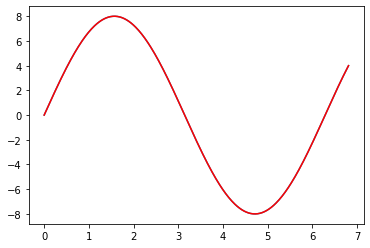

In [16]:
plot(t,yt,t,y1,'r')

## The finite difference method is case by case.

In [8]:
def f(t,y):
    return -y

$y'' +y = 0$

$y'' = -y$

$y_{k+1}-2y_k +y_{k-1} = -y_k h^2$

$y_{k+1} -(2-h^2)y_k +y_{k-1} = 0$

In [9]:
t0 = 0
tf = 13*pi/6
y0 = 0
yf = 4
n = 400
h = (tf-t0)/(n-1)
t = linspace(t0,tf,n)

A = mat(zeros([n,n]))
b = mat(zeros([n,1]))
# initial value
A[0,0] = 1
b[0,0] = y0

# middle term
for i in range(1,n-1):
    A[i,i] = -(2-h**2)
    A[i,i-1] = 1
    A[i,i+1] = 1

# boundary value
A[n-1,n-1] = 1
b[n-1,0] = yf

y = inv(A)*b


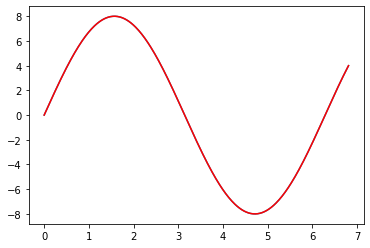

In [10]:
plot(t,yt,t,y,'r')

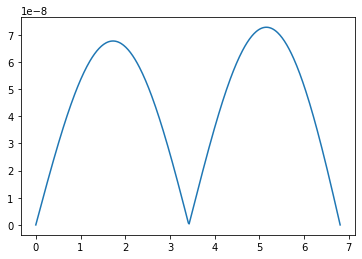

In [11]:
plot(t,abs(yt-y1)) #error of shooting method

In [ ]:
y.shape

(400, 1)

In [ ]:
t.shape

(400,)

In [ ]:
y = np.array(list(y[:,0]))
y.shape

(400,)

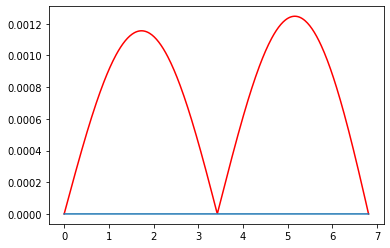

In [ ]:
plot(t,abs(yt-y),'r',t,abs(yt-y1))